This example shows the basics of creating a simple neural network- in this case a Multi Layer Perceptron (MLP) for a basic introduction to neural nets with pytorch. We will be using a classic dataset built into the pytorch library, MNIST. This dataset is a collection of handwritten digits, with the goal of generating a network that can classify the images into classes representing the numbers 0 through 9. 

We're first going to import the libraries we need for this project

# About Multi Layer Perceptrons

MLPs are one of the simplest neural networks you can make. They consist of <strong>multiple layers</strong> fully connected neurons, with non-linear activation functions between them. 

Each of these layers is represented by a matrix of weights. These weights multiply the data incoming to the layer in some way to reinterpret the input as some output, hopefully with some insight or information we didn't have before. In between each layer, an activation function is used. While biologically inspired by the <string>activation</strong> of neurons in a brain, the theoretical underpinning of these activation layers is to create non-linearity between the layers. If fully-connected layers are connected directly without a non-linear intermediary, they can be decomposed into some other single layer, losing the power of having multiple layers. By having something in between them that doesn't follow the direct rules of linear algebra (matrix multiplications), each layer can work independently and work to achieve something greater.



First, let's import the module's we'll be using. These are all pretty standard for any pytorch project

In [93]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from  torch.utils.data import DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

Here, we import the pytorch library, as well as a few specific classes that we will be using. The nn class is the super class for any neural network; to train models in the pytorch ecosystem we will need to inherit from this class. The Dataset class represents the data used for training and validation, and abstracts away a lot of the boilerplate of working with datasets. The DataLoader class makes it easy to load data and manipulate it for training and validation. Numpy and matplotlib should be familiar to anyone who has worked with data in python.

From Here, we're going to need data to train on. Thankfully, pytorch comes equipped with a few cannonical data sets we can play with, and we'll use these in the beginning to make the start easier. Later on we'll roll our own data sets, but for now let's take the easy way. We're going to be including MNIST. 

In [95]:
training_data_dir = "trainingData"


mnist_data = torchvision.datasets.MNIST(root=training_data_dir, 
                                        train=True, 
                                        download=True, 
                                        transform=None, 
                                        target_transform=None)

This sets up the mnist dataset. We're specifying a directory (that doesn't initially exist) with the `training_data_dir` variable, but the key here is the `download` argument. This tells pytorch to download the data if it isn't already there.

Don't worry abou the 'tranforms' just yet, we'll get to them when we need to manipulate data later. Now, we need some way to load the data. Thankfully, the DataLoader class makes this trivial in the case of MNIST.





In [96]:
mnist_dataloader = DataLoader(mnist_data, batch_size=64, shuffle=True)


The DataLoader class helps manage loading the data in minibatches for training. Eventually, you will want to write you own DataLoaders and Datasets, but for now these make working with data extremely easy.


## The Simplest Way

pytorch comes with many architectures baked into the library for us to use, and MLPs are one of the simplest.

In [ ]:
torchvision.ops.MLP()

In [88]:


class LinearLayer(nn.Module):
    def __init__(self, in_dims, out_dims, bias = True):
        super().__init__()
        self.in_dims = in_dims
        self.out_dims = out_dims
        
        if not bias:
            self.bias = nn.Parameter(torch.zeros(out_dims), requires_grad=False)
        else:
            #rand is [0,1]
            #even better, use Kaiming and Xavier, helps to stop dot product from climbing when in large dimensions
            self.bias = nn.Parameter(torch.randn(out_dims, requires_grad=True))
        
        self.layer = nn.Parameter(torch.randn(in_dims, out_dims) / out_dims**0.5, requires_grad=True)
        
        pass
    
    
    # 5x5, a order-2 tensor (matrix), a,b,c,d,e is a order-5 tensor
    # [batch, in_dims] -> [batch, out_dims]
    def forward(self, x):
        # @ operator performs matmult
        x = x @ self.layer
        #or
        # torch.einsum("bi,ij,bj")
        #can't +=
        x = x + self.bias
        return x
        

    

def load_from_file(self, file_src):
    state = torch.load(file_src)
    ll = LinearLayer(256,256)
    ll.load_state_dict(state)


def save(linearLayer, file_src):
    torch.save(linearLayer.state_dict(), file_src)


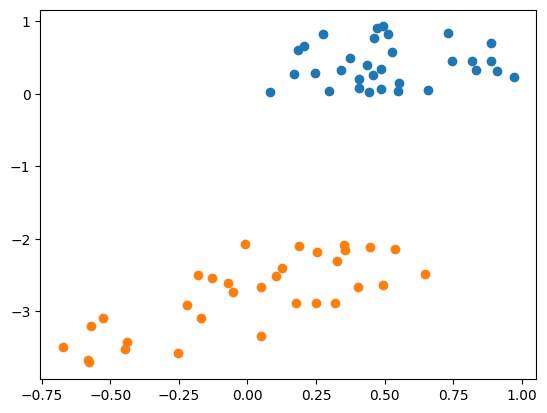

In [27]:
layer = LinearLayer(2,2)

batch = torch.rand(32,2)

#removes gradient from final product, great for visualizing inference, breaks training cause no gradient
with torch.no_grad():
    output = layer(batch)

plt.scatter(batch[:,0], batch[:,1])
#plt.scatter(output[:,0], output[:,1]) # picked up a gradient, cant plot one with a gradient

output_without_grad = output.detach()

plt.scatter(output_without_grad[:,0], output_without_grad[:,1]) 

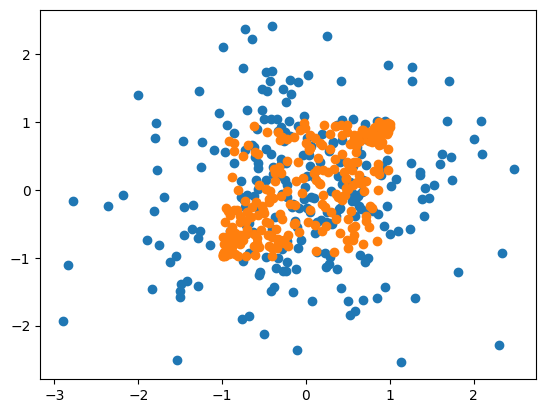

In [92]:
batch = torch.randn(256,2)

network = nn.Sequential(
    LinearLayer(2,256, False),
    nn.Tanh(),
    LinearLayer(256,2, False),
    nn.Tanh(),
)

with torch.no_grad():
    output_without_grad = network(batch)

plt.scatter(batch[:,0], batch[:,1])
plt.scatter(output_without_grad[:,0], output_without_grad[:,1]) 
plt.show()